### Imports

In [2]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

%matplotlib inline
sys.path.append("..")

from utils import label_map_util
from utils import visualization_utils as vis_util

### Saving video to frames

In [14]:
vidcap = cv2.VideoCapture('test_videos/video1.m4v')
success,image = vidcap.read()
count = 0
success = True
while success:
  success,image = vidcap.read()
  cv2.imwrite("video_frames/frame%d.jpg" % count, image)     # save frame as JPEG file
  count += 1
  if (count > 500):
        success = False

### Loading in model 

In [4]:
MODEL_NAME = 'ssd_mobilenet_v1_coco_11_06_2017'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')
NUM_CLASSES = 90
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

### Object Detection on specific frame

[[  1.   1.   1.   1.   1.   1.   1.   1.  31.   1.   1.  16.   1.  31.
    1.  28.   1.  31.   1.   1.   1.   1.   3.  31.   1.  31.   1.  31.
    1.  28.   1.   1.  31.  28.   1.   1.   6.   1.  31.   1.   1.   3.
   28.  28.   1.   1.  31.  16.  84.  16.  31.   1.  28.   1.   1.   1.
    1.  31.  31.   1.  28.   3.   1.   1.  28.   1.  28.   1.  28.  28.
    1.  42.  16.  84.  28.   1.   1.   1.  42.   1.  27.   1.  28.   1.
    1.   1.  28.  28.   1.   1.  27.   1.   6.   3.   1.  42.  16.  28.
    1.   3.]]


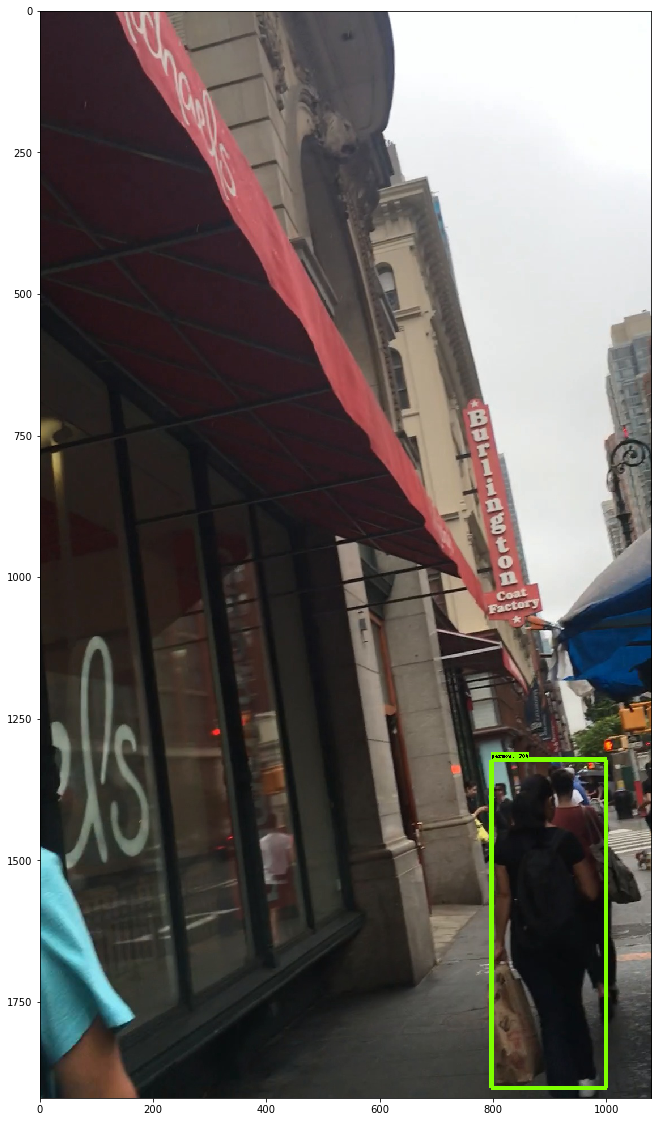

In [17]:
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    image = Image.open('video_frames/frame400.jpg')
    width, height = image.size
    IMAGE_SIZE = (width/96.0, height/96.0)
    image_np = load_image_into_numpy_array(image)
    image_np_expanded = np.expand_dims(image_np, axis=0)
    (boxes, scores, classes, num) = sess.run(
        [detection_boxes, detection_scores, detection_classes, num_detections],
        feed_dict={image_tensor: image_np_expanded})
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        np.squeeze(boxes),
        np.squeeze(classes).astype(np.int32),
        np.squeeze(scores),
        category_index,
        use_normalized_coordinates=True,
        line_thickness=8)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)
print(classes)

In [18]:
print boxes

[[[ 0.68923938  0.73771185  0.99033737  0.92578846]
  [ 0.7349782   0.70643109  0.79269373  0.74784225]
  [ 0.7276361   0.8572405   0.98080647  0.96437913]
  [ 0.6942625   0.96023846  0.73700964  0.99041867]
  [ 0.69728065  0.91568309  0.735623    0.94921547]
  [ 0.68402141  0.          0.97972149  0.16781282]
  [ 0.70957255  0.72424853  0.81476998  0.79999137]
  [ 0.72245109  0.89142466  0.80900657  0.96716225]
  [ 0.75059283  0.88618988  0.87818789  0.96579975]
  [ 0.70584935  0.85260504  0.74428052  0.90412873]
  [ 0.71764266  0.72314245  0.98629296  0.84280056]
  [ 0.01849468  0.30952767  0.40781194  0.61222315]
  [ 0.55307025  0.00884642  0.97092336  0.22203475]
  [ 0.81523967  0.72697282  0.95544684  0.79359531]
  [ 0.3916668   0.          0.99728358  0.17231971]
  [ 0.47089672  0.84328604  0.65918386  0.99988937]
  [ 0.7026968   0.79118598  0.74611533  0.84234905]
  [ 0.87109411  0.73096597  0.98152113  0.82170451]
  [ 0.69817477  0.72624254  0.75045544  0.79882872]
  [ 0.713765